In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Wrangling

### The process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.


## The goal here is:

- To join two data files, one containing total enrollment of students according to race per school district and one containing total revenue per school district. 
- Add a district code key from a text file containing school district name, school district code, and zipcode. The district code here will serve as a key to connect with another dataset containing students outcome. 

The final dataset should contain the following columns: Agency name, district code, zipcode, seven colmns representing total enrollment according to race, total enrollment, total revenue and a new column containing revenue per student for each school district.

### Reading files:
1. Total enrollment according to race per school dsitrict:



In [2]:
df_enrollment = pd.read_csv('data/total_enrollment_per_race.csv', index_col=0)
df_enrollment.head()

,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment
0,ABC UNIFIED,1791.0,9425.0,1302.0,7459.0,63.0,158.0,524.0,20722.0
1,ACALANES UNION HIGH,95.0,508.0,3622.0,850.0,9.0,16.0,402.0,5502.0
2,ACKERMAN CHARTER,4.0,74.0,460.0,9.0,2.0,0.0,37.0,586.0
3,ACTON-AGUA DULCE UNIFIED,705.0,3466.0,4199.0,536.0,36.0,18.0,1040.0,10000.0
4,ADELANTO ELEMENTARY,2156.0,6327.0,1010.0,139.0,35.0,88.0,517.0,10272.0


2. Total revenue per school district:



In [3]:
df_revenue = pd.read_csv('data/total_revenue_per_district.csv', index_col=0)
df_revenue.head()

,Agency Name,Total Local Revenue,Total State Revenue,Total Federal Revenue,Total Revenue
0,ABC UNIFIED,171312000.0,39046000.0,15893000.0,226251000.0
1,ACALANES UNION HIGH,27481000.0,8624000.0,1605000.0,37710000.0
2,ACKERMAN CHARTER,3714000.0,473000.0,223000.0,4410000.0
3,ACTON-AGUA DULCE UNIFIED,25820000.0,2913000.0,1250000.0,29983000.0
4,ADELANTO ELEMENTARY,96654000.0,12463000.0,10906000.0,120023000.0


3. Text file containing district code, district name, and zipcode:



In [4]:
df_distcode = pd.read_csv('data/districCode_ca2017entities_csv.txt')
df_distcode.head()

,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,0,0,0,NaN,2017,4,State of California,NaN,NaN,
1,1,0,0,NaN,2017,5,Alameda,NaN,NaN,
2,1,10017,0,NaN,2017,6,Alameda,Alameda County Office Of Education,NaN,
3,1,10017,112607,NaN,2017,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612
4,1,10017,123968,NaN,2017,9,Alameda,Community School For Creative Education,Community School For Creative Education,94606


### Joining enrollment dataset + total revenue per district:

In [5]:
# filtering only the last column of the revenue dataset

df_total_revenue = df_revenue.drop(df_revenue.columns[0:-1], axis = 1)
#df_total_revenue.head()

In [6]:
df_enrollment_revenue = pd.merge(df_enrollment, df_total_revenue, left_index=True, right_index=True)
df_enrollment_revenue.head()

,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue
0,ABC UNIFIED,1791.0,9425.0,1302.0,7459.0,63.0,158.0,524.0,20722.0,226251000.0
1,ACALANES UNION HIGH,95.0,508.0,3622.0,850.0,9.0,16.0,402.0,5502.0,37710000.0
2,ACKERMAN CHARTER,4.0,74.0,460.0,9.0,2.0,0.0,37.0,586.0,4410000.0
3,ACTON-AGUA DULCE UNIFIED,705.0,3466.0,4199.0,536.0,36.0,18.0,1040.0,10000.0,29983000.0
4,ADELANTO ELEMENTARY,2156.0,6327.0,1010.0,139.0,35.0,88.0,517.0,10272.0,120023000.0


### Adding the column 'Revenue per student':

In [7]:
df_enrollment_revenue['Revenue per student'] = df_enrollment_revenue['Total Revenue']/df_enrollment_revenue['Total Enrollment']
df_enrollment_revenue['Revenue per student'] = round(df_enrollment_revenue['Revenue per student'], 2) 


df_enrollment_revenue.sort_values(by=['Agency Name'])
df_enrollment_revenue.head(35)

,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
0,ABC UNIFIED,1791.0,9425.0,1302.0,7459.0,63.0,158.0,524.0,20722.0,226251000.0,10918.40
1,ACALANES UNION HIGH,95.0,508.0,3622.0,850.0,9.0,16.0,402.0,5502.0,37710000.0,6853.87
2,ACKERMAN CHARTER,4.0,74.0,460.0,9.0,2.0,0.0,37.0,586.0,4410000.0,7525.60
3,ACTON-AGUA DULCE UNIFIED,705.0,3466.0,4199.0,536.0,36.0,18.0,1040.0,10000.0,29983000.0,2998.30
4,ADELANTO ELEMENTARY,2156.0,6327.0,1010.0,139.0,35.0,88.0,517.0,10272.0,120023000.0,11684.48
5,ALAMEDA CNTY. STUDENT EXCHANGE PROG.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
6,ALAMEDA COUNTY OFFICE OF EDUCATION,543.0,1581.0,209.0,263.0,16.0,33.0,225.0,2870.0,55795000.0,19440.77
7,ALAMEDA UNIFIED,924.0,1897.0,3292.0,3722.0,33.0,85.0,1206.0,11159.0,96642000.0,8660.45
8,ALBANY CITY UNIFIED,117.0,603.0,1368.0,1080.0,5.0,7.0,522.0,3702.0,58211000.0,15724.20
9,ALEXANDER VALLEY UNION ELEMENTARY,1.0,48.0,80.0,0.0,0.0,0.0,1.0,130.0,1123000.0,8638.46


In [8]:
df_enrollment_revenue.tail(35)

,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
1126,WESTSIDE UNION ELEMENTARY,986.0,4167.0,3206.0,401.0,20.0,12.0,510.0,9302.0,83599000.0,8987.21
1127,WESTWOOD UNIFIED,5.0,54.0,248.0,4.0,17.0,0.0,18.0,346.0,2746000.0,7936.42
1128,WHEATLAND,63.0,299.0,781.0,47.0,17.0,10.0,117.0,1334.0,16268000.0,12194.90
1129,WHEATLAND UNION HIGH,25.0,223.0,364.0,21.0,9.0,2.0,95.0,739.0,7190000.0,9729.36
1130,WHITMORE UNION ELEMENTARY,3.0,25.0,159.0,1.0,1.0,1.0,26.0,216.0,2599000.0,12032.41
1131,WHITTIER CITY ELEMENTARY,40.0,5574.0,230.0,47.0,12.0,7.0,165.0,6075.0,64739000.0,10656.63
1132,WHITTIER UNION HIGH,105.0,10604.0,968.0,256.0,21.0,16.0,51.0,12021.0,163000000.0,13559.60
1133,WILLIAM (R) ROUSE ROP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1134,WILLIAM S. HART UNION HIGH,1275.0,10623.0,10383.0,2856.0,83.0,34.0,1512.0,26766.0,239609000.0,8951.99
1135,WILLIAMS UNIFIED,4.0,1284.0,71.0,15.0,2.0,1.0,5.0,1382.0,13664000.0,9887.12


In [9]:
#df_enrollment_revenue.info

### Filter from the text file the following columns: distrtict code, district name, and zipcode

In [10]:
df_distcode.columns

Index(['County Code', 'District Code', 'School Code', 'Filler', 'Test Year',
       'Type Id', 'County Name', 'District Name', 'School Name', 'Zip Code'],
      dtype='object')

In [11]:
del_columns = ['County Code', 'School Code', 'Filler', 'Test Year', 'Type Id', 'County Name', 'School Name']
df_dist_code = df_distcode.drop(del_columns, 1)

In [12]:
df_del_dup = df_dist_code.drop_duplicates(['District Name'])
#df_del_dup.head()

In [13]:
df_sorted = df_del_dup.sort_values(by=['District Name'])
df_sorted['District Name'] = df_sorted['District Name'].str.upper()
df_sorted.head()

,District Code,District Name,Zip Code
2150,64212,ABC UNIFIED,
10231,70920,ABRAXIS CHARTER,95401
8630,68627,ACACIA ELEMENTARY CHARTER,95210
8629,68627,ACACIA MIDDLE CHARTER,95210
2930,64733,ACADEMIA MODERNA,90255


In [14]:
df_sorted.to_csv('data/district_code_with_district_name.csv')

In [15]:
df_sorted['Zip Code'] = df_sorted['Zip Code'].apply(pd.to_numeric, errors='coerce')
df_sorted['Agency Name'] = df_sorted['District Name']

In [16]:
df_district = df_sorted[df_sorted['Zip Code'].isna()]

In [17]:
del df_district['Zip Code']
del df_district['District Name']

In [18]:
df_district.reset_index()

,index,District Code,Agency Name
0,2150,64212,ABC UNIFIED
1,611,61630,ACALANES UNION HIGH
2,5822,66761,ACKERMAN CHARTER
3,4363,75309,ACTON-AGUA DULCE UNIFIED
4,6955,67587,ADELANTO ELEMENTARY
...,...,...,...
1001,9948,70516,YREKA UNION HIGH
1002,10581,71464,YUBA CITY UNIFIED
1003,11280,10587,YUBA COUNTY OFFICE OF EDUCATION
1004,7433,67959,YUCAIPA-CALIMESA JOINT UNIFIED


In [19]:
df_enrollment_revenue

,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
0,ABC UNIFIED,1791.0,9425.0,1302.0,7459.0,63.0,158.0,524.0,20722.0,226251000.0,10918.40
1,ACALANES UNION HIGH,95.0,508.0,3622.0,850.0,9.0,16.0,402.0,5502.0,37710000.0,6853.87
2,ACKERMAN CHARTER,4.0,74.0,460.0,9.0,2.0,0.0,37.0,586.0,4410000.0,7525.60
3,ACTON-AGUA DULCE UNIFIED,705.0,3466.0,4199.0,536.0,36.0,18.0,1040.0,10000.0,29983000.0,2998.30
4,ADELANTO ELEMENTARY,2156.0,6327.0,1010.0,139.0,35.0,88.0,517.0,10272.0,120023000.0,11684.48
...,...,...,...,...,...,...,...,...,...,...,...
1156,YREKA UNION ELEMENTARY,7.0,150.0,574.0,25.0,149.0,0.0,54.0,959.0,9436000.0,9839.42
1157,YREKA UNION HIGH,5.0,98.0,424.0,8.0,36.0,0.0,63.0,634.0,6836000.0,10782.33
1158,YUBA CITY UNIFIED,244.0,5869.0,3785.0,2538.0,86.0,44.0,718.0,13284.0,137279000.0,10334.16
1159,YUBA COUNTY OFFICE OF EDUCATION,18.0,165.0,287.0,15.0,20.0,2.0,59.0,566.0,29297000.0,51761.48


### Merging the two main datasets:

In [20]:
df_merged_district = pd.merge(df_district, df_enrollment_revenue)
df_merged_district.head(50)

,District Code,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
0,64212,ABC UNIFIED,1791.0,9425.0,1302.0,7459.0,63.0,158.0,524.0,20722.0,226251000.0,10918.40
1,61630,ACALANES UNION HIGH,95.0,508.0,3622.0,850.0,9.0,16.0,402.0,5502.0,37710000.0,6853.87
2,66761,ACKERMAN CHARTER,4.0,74.0,460.0,9.0,2.0,0.0,37.0,586.0,4410000.0,7525.60
3,75309,ACTON-AGUA DULCE UNIFIED,705.0,3466.0,4199.0,536.0,36.0,18.0,1040.0,10000.0,29983000.0,2998.30
4,67587,ADELANTO ELEMENTARY,2156.0,6327.0,1010.0,139.0,35.0,88.0,517.0,10272.0,120023000.0,11684.48
5,10017,ALAMEDA COUNTY OFFICE OF EDUCATION,543.0,1581.0,209.0,263.0,16.0,33.0,225.0,2870.0,55795000.0,19440.77
6,61119,ALAMEDA UNIFIED,924.0,1897.0,3292.0,3722.0,33.0,85.0,1206.0,11159.0,96642000.0,8660.45
7,61127,ALBANY CITY UNIFIED,117.0,603.0,1368.0,1080.0,5.0,7.0,522.0,3702.0,58211000.0,15724.20
8,70599,ALEXANDER VALLEY UNION ELEMENTARY,1.0,48.0,80.0,0.0,0.0,0.0,1.0,130.0,1123000.0,8638.46
9,75713,ALHAMBRA UNIFIED,112.0,7071.0,349.0,9084.0,33.0,16.0,406.0,17071.0,250138000.0,14652.80


In [21]:
df_merged_district.loc[df_merged_district['District Code'] == 10157]

,District Code,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
397,10157,KERN COUNTY OFFICE OF EDUCATION,257.0,2855.0,1092.0,81.0,25.0,6.0,73.0,4389.0,303202000.0,69082.25


In [22]:
df_merged_district.to_csv('total_enrollment_per_race_with_districtcode.csv')

In [23]:
# Need to clean missing data, outliers, etc as we can see below

df_merged_district.sort_values(by=['Revenue per student'])

,District Code,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
540,71175,MODESTO CITY HIGH,537.0,8547.0,4067.0,948.0,57.0,135.0,1097.0,15388.0,0.0,0.00
812,77032,SBE - AUDEO CHARTER II,6.0,173.0,89.0,3.0,0.0,2.0,14.0,287.0,0.0,0.00
539,71167,MODESTO CITY ELEMENTARY,364.0,10546.0,2501.0,673.0,57.0,87.0,1102.0,15330.0,0.0,0.00
813,76547,SBE - BARACK OBAMA CHARTER,211.0,134.0,3.0,1.0,1.0,0.0,5.0,355.0,0.0,0.00
814,76943,SBE - BAYPOINT PREPARATORY ACADEMY,25.0,171.0,164.0,12.0,1.0,1.0,9.0,383.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
777,10413,SAN MATEO COUNTY OFFICE OF EDUCATION,9.0,115.0,41.0,53.0,0.0,12.0,10.0,240.0,164683000.0,686179.17
440,10181,LASSEN COUNTY OFFICE OF EDUCATION,1.0,1.0,9.0,0.0,0.0,0.0,2.0,13.0,11513000.0,885615.38
177,10066,COLUSA COUNTY OFFICE OF EDUCATION,0.0,2.0,1.0,0.0,0.0,0.0,1.0,4.0,11679000.0,2919750.00
413,71142,KNIGHTS FERRY ELEMENTARY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,965000.0,inf


----------

# Exploratory Data Analysis - EDA

### In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [24]:
df_merged_district.shape

(1005, 12)

In 2019-2020 there was 1,037 school districts in California. See the California Department of Education article below.
https://www.cde.ca.gov/ds/sd/cb/ceffingertipfacts.asp

It appears that in 2015 there was around 977 school districts in California. See article from Ballotpedia.
https://ballotpedia.org/List_of_school_districts_in_California

Our dataset got 1005 school districts which so far appears to be a reasonable expectation for the year of 2017.

In [25]:
# checking for NaNs
df_merged_district.isna().sum()

District Code                       0
Agency Name                         0
Black                               0
Hispanic                            0
White                               0
Asian or Pacific Islander           0
American Indian/Alaska Native       0
Hawaiian Native/Pacific Islander    0
Two or More Races                   0
Total Enrollment                    0
Total Revenue                       0
Revenue per student                 0
dtype: int64

In [26]:
df_merged_district['Revenue per student'] = df_merged_district['Revenue per student'].replace(np.inf, np.nan)

In [27]:
df_merged_district['Revenue per student'].isna().sum()

2

In [28]:
df_district = df_merged_district.dropna()
df_district['Revenue per student'].isna().sum()

0

### Exploring REVENUE PER STUDENT

In [29]:
# the standard deviation indicates that there's likely very large values on the column 'Revenue per student'
# Probably because we have missing data for total enrollment
# We need to clean the dataset -- one way is to drop 

mean = np.mean(df_district['Revenue per student'])
std = np.std(df_district['Revenue per student'])
median = np.median(df_district['Revenue per student'])

print('mean: ', mean)
print('standard deviation: ', std)
print('median: ', median)

mean:  20378.265852442713
standard deviation:  105212.65096563658
median:  9795.73


In [30]:
# counts the number of zeroes per row in the dataset
df_district.isin([0]).sum()

District Code                         0
Agency Name                           0
Black                               160
Hispanic                              6
White                                 6
Asian or Pacific Islander           132
American Indian/Alaska Native       137
Hawaiian Native/Pacific Islander    321
Two or More Races                    46
Total Enrollment                      0
Total Revenue                        21
Revenue per student                  21
dtype: int64



Q: There are 21 rows containing zeroes for Total Revenue, consequently for Revenue per student -- we could perhaps input the median for revenue per student for these?

---------


In [31]:
# replace zeroes in revenueper student with the median
df_district['Revenue per student'].replace(to_replace=0, value = df_district['Revenue per student'].median(), inplace = True)

#df_district['Revenue per student'] = df_district['Revenue per student'].replace(0, 9795.73)

/Users/gabriellewald/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [32]:
df_district.isin([0]).sum()

District Code                         0
Agency Name                           0
Black                               160
Hispanic                              6
White                                 6
Asian or Pacific Islander           132
American Indian/Alaska Native       137
Hawaiian Native/Pacific Islander    321
Two or More Races                    46
Total Enrollment                      0
Total Revenue                        21
Revenue per student                   0
dtype: int64

In [33]:
df_district['Revenue per student'].sort_values(ascending=False)

177    2919750.00
440     885615.38
777     686179.17
425     542441.18
763     472842.54
          ...    
504       1650.05
530       1377.98
503       1004.97
317        583.70
702        571.21
Name: Revenue per student, Length: 1003, dtype: float64

array([[<AxesSubplot:title={'center':'Revenue per student'}>]],
      dtype=object)

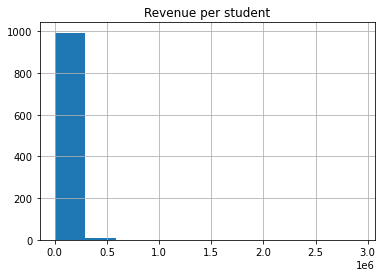

In [34]:
# need to figure this out
data = df_district['Revenue per student']
binwidth = (data.max() - data.min()) / 10
df_district.hist(column='Revenue per student', bins=np.arange(min(data), max(data) + binwidth, binwidth))

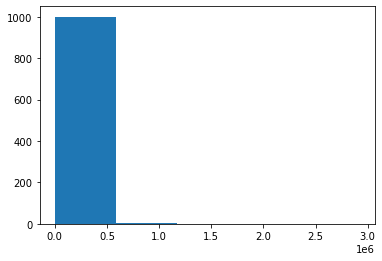

In [35]:
_ = plt.hist(df_district['Revenue per student'], bins=5)

### Exploring TOTAL ENROLLMENT

In [36]:
# what's the total enrollment

mean = np.mean(df_district['Total Enrollment'])
std = np.std(df_district['Total Enrollment'])
median = np.median(df_district['Total Enrollment'])

print('mean: ', mean)
print('standard deviation: ', std)
print('median: ', median)

mean:  6187.547357926222
standard deviation:  22190.95937144281
median:  1884.0


In [37]:
df_district['Total Enrollment'].sort_values(ascending=True)

177         4.0
649         6.0
169         7.0
277        10.0
80         11.0
         ...   
243     62552.0
292     73356.0
474     76428.0
761    128040.0
479    633621.0
Name: Total Enrollment, Length: 1003, dtype: float64

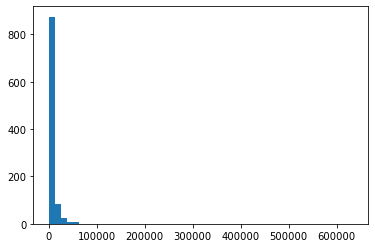

In [38]:
# Need to figure this out


_ = plt.hist(df_district['Total Enrollment'], bins = 50)

In [39]:
df_district


,District Code,Agency Name,Black,Hispanic,White,Asian or Pacific Islander,American Indian/Alaska Native,Hawaiian Native/Pacific Islander,Two or More Races,Total Enrollment,Total Revenue,Revenue per student
0,64212,ABC UNIFIED,1791.0,9425.0,1302.0,7459.0,63.0,158.0,524.0,20722.0,226251000.0,10918.40
1,61630,ACALANES UNION HIGH,95.0,508.0,3622.0,850.0,9.0,16.0,402.0,5502.0,37710000.0,6853.87
2,66761,ACKERMAN CHARTER,4.0,74.0,460.0,9.0,2.0,0.0,37.0,586.0,4410000.0,7525.60
3,75309,ACTON-AGUA DULCE UNIFIED,705.0,3466.0,4199.0,536.0,36.0,18.0,1040.0,10000.0,29983000.0,2998.30
4,67587,ADELANTO ELEMENTARY,2156.0,6327.0,1010.0,139.0,35.0,88.0,517.0,10272.0,120023000.0,11684.48
...,...,...,...,...,...,...,...,...,...,...,...,...
1000,70508,YREKA UNION ELEMENTARY,7.0,150.0,574.0,25.0,149.0,0.0,54.0,959.0,9436000.0,9839.42
1001,70516,YREKA UNION HIGH,5.0,98.0,424.0,8.0,36.0,0.0,63.0,634.0,6836000.0,10782.33
1002,71464,YUBA CITY UNIFIED,244.0,5869.0,3785.0,2538.0,86.0,44.0,718.0,13284.0,137279000.0,10334.16
1003,10587,YUBA COUNTY OFFICE OF EDUCATION,18.0,165.0,287.0,15.0,20.0,2.0,59.0,566.0,29297000.0,51761.48


### Exploring TOTAL REVENUE

In [40]:
# Is the result in millions???

mean = np.mean(df_district['Total Enrollment'])
std = np.std(df_district['Total Enrollment'])
median = np.median(df_district['Total Enrollment'])

print('mean: ', mean)
print('standard deviation: ', std)
print('median: ', median)

mean:  6187.547357926222
standard deviation:  22190.95937144281
median:  1884.0
